In [1]:
'''
1. データセットの読み込み 
'''
# tensorflow.keras のインポート
from tensorflow import keras


# Fashion-MNISTデータセットの読み込み
(x_train, t_train), (x_test, t_test) = keras.datasets.fashion_mnist.load_data()

In [2]:
'''
2. 収録されているデータを調べる
'''
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
'''
3. x_trainに格納されている1つ目の画像データを出力
'''
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

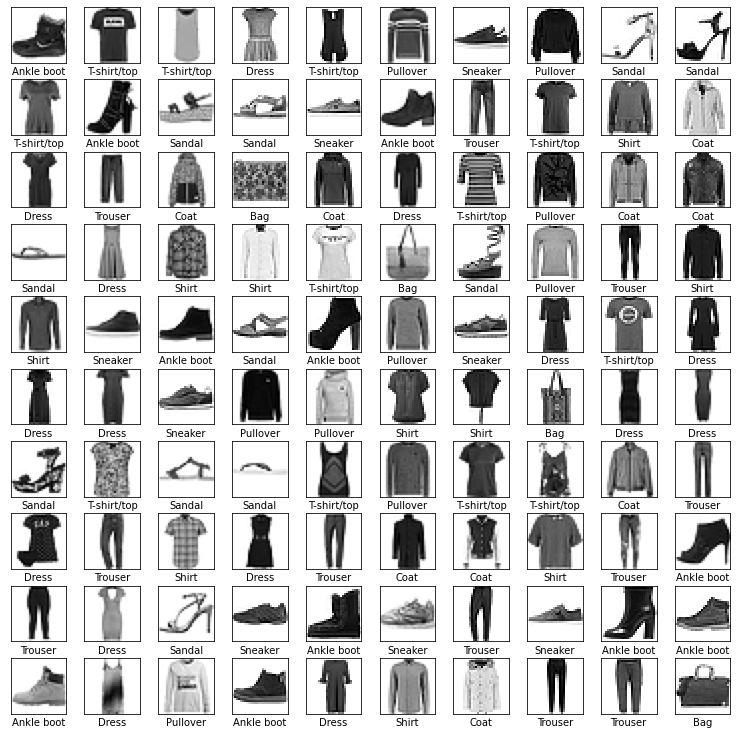

In [4]:
'''
4. データを抽出してプロットする 
'''
import matplotlib.pyplot as plt
%matplotlib inline

# ラベルに割り当てられたアイテム名を登録
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(13,13))
# 訓練データから100枚抽出してプロットする
for i in range(100):
    # 10×10で出力
    plt.subplot(10,10,i+1)
    # タテ方向の間隔を空ける
    plt.subplots_adjust(hspace=0.3)
    # 軸目盛を非表示にする
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # カラーマップにグレースケールを設定してプロット
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # x軸ラベルにアイテム名を出力
    plt.xlabel(class_names[t_train[i]])
plt.show()

In [5]:
'''
5. (28,28)の画像データを(784)のベクトルに変換して正規化を行う 
'''
# (60000, 28, 28)の訓練データを(60000, 784)の2階テンソルに変換
tr_x = x_train.reshape(-1, 784)
# 訓練データをfloat32(浮動小数点数)型に、255で割ってスケール変換する
tr_x = tr_x.astype('float32') / 255

# (10000, 28, 28)のテストデータを(10000, 784)の2階テンソルに変換
ts_x = x_test.reshape(-1, 784)
# テストデータをfloat32(浮動小数点数)型に、255で割ってスケール変換する
ts_x = ts_x.astype('float32') / 255

print(tr_x.shape)
print(ts_x.shape)

(60000, 784)
(10000, 784)


In [6]:
'''
6. 訓練データの正解ラベルを出力
'''
print(t_train)

[9 0 0 ... 3 0 5]


In [7]:
'''
7. 正解ラベルのOne-Hotエンコーディング
'''
# tensorflow.keras のインポート
from tensorflow import keras

# クラスの数
class_num = 10
# 訓練データの正解ラベルをOne-Hot表現に変換
tr_t = keras.utils.to_categorical(t_train, class_num)
# テストデータの正解ラベルをOne-Hot表現に変換
ts_t = keras.utils.to_categorical(t_test, class_num)

print('tr_t[0]   :', tr_t[0])
print('ts_t[0]   :', ts_t[0])
print('tr_t.shape:',tr_t.shape)
print('ts_t.shape:',ts_t.shape)

tr_t[0]   : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
ts_t[0]   : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
tr_t.shape: (60000, 10)
ts_t.shape: (10000, 10)


In [8]:
'''
8.モデルの作成
'''
class MLP(keras.Model):
    '''多層パーセプトロン
    
    Attributes:
      l1(Dense): 隠れ層
      l2(Dense): 出力層
    '''
    def __init__(self, hidden_dim, output_dim):
        '''
        Parameters:
          hidden_dim(int): 隠れ層のユニット数(次元)
          output_dim(int): 出力層のユニット数(次元)
        '''
        super().__init__()
        # 隠れ層：活性化関数はReLU
        self.l1 = keras.layers.Dense(hidden_dim, activation='relu')
        # 出力層：活性化関数はソフトマックス
        self.l2 = keras.layers.Dense(output_dim, activation='softmax')

    def call(self, x):
        '''MLPのインスタンスからコールバックされる関数
        
        Parameters: x(ndarray(float32)):訓練データ、または検証データ
        Returns(float32): MLPの出力として要素数3の1階テンソル        
        '''
        h = self.l1(x) # 第1層の出力
        y = self.l2(h) # 出力層の出力
        return y

In [9]:
'''
9.損失関数の定義
'''
# マルチクラス分類のクロスエントロピー誤差を求めるオブジェクト
cce = keras.losses.CategoricalCrossentropy()

def loss(t, y):
    '''損失関数
    Parameters: t(ndarray(float32)):正解ラベル
                y(ndarray(float32)):予測値
                
    Returns: クロスエントロピー誤差
    '''
    return cce(t, y)

In [10]:
'''
10.勾配降下アルゴリズムによるパラメーターの更新処理
'''
import tensorflow as tf

# 勾配降下アルゴリズムを使用するオプティマイザーを生成
optimizer = keras.optimizers.SGD(learning_rate=0.1)

# 損失を記録するオブジェクトを生成
train_loss = keras.metrics.Mean()
# カテゴリカルデータの精度を記録するオブジェクトを生成
train_acc = keras.metrics.CategoricalAccuracy()

def train_step(x, t):
    '''学習を1回行う
    
    Parameters: x(ndarray(float32)):訓練データ
                t(ndarray(float32)):正解ラベル
                
    Returns:
      ステップごとのクロスエントロピー誤差
    '''
    # 自動微分による勾配計算を記録するブロック
    with tf.GradientTape() as tape:
        # モデルに入力して順伝搬の出力値を取得
        outputs = model(x)
        # 出力値と正解ラベルの誤差
        tmp_loss = loss(t, outputs)
        
    # tapeに記録された操作を使用して誤差の勾配を計算        
    grads = tape.gradient(
        # 現在のステップの誤差
        tmp_loss,
        # バイアス、重みのリストを取得
        model.trainable_variables)
    # 勾配降下法の更新式を適用してバイアス、重みを更新
    optimizer.apply_gradients(zip(grads,
                                  model.trainable_variables))
    
    # 損失をMeanオブジェクトに記録
    train_loss(tmp_loss)
    # 精度をCategoricalAccuracyオブジェクトに記録
    train_acc(t, outputs)
        
    return tmp_loss

In [11]:
'''
11.訓練データと検証データの用意
'''
from sklearn.model_selection import train_test_split

# 訓練データと検証データに8：2の割合で分割  \は行継続文字
x_train, x_validation, t_train, t_validation = \
    train_test_split(tr_x, tr_t, test_size=0.2)
print(x_train.shape)
print(x_validation.shape)
print(t_train.shape)
print(t_validation.shape)

(48000, 784)
(12000, 784)
(48000, 10)
(12000, 10)


In [12]:
%%time
'''
12.モデルを生成して学習する
'''
from sklearn.utils import shuffle

# エポック数
epochs = 100
# ミニバッチのサイズ
batch_size = 64
#ステップ数
steps = x_train.shape[0] // batch_size

# 隠れ層256ユニット、出力層10ユニットのモデルを生成
model = MLP(256, 10)

# 学習を行う
for epoch in range(epochs):
    # 訓練データと正解ラベルをシャッフル
    x_, t_ = shuffle(x_train, t_train, random_state=1)
    
    # 1ステップにおけるミニバッチを使用した学習
    for step in range(steps):
        start = step * batch_size # ミニバッチの先頭インデックス
        end = start + batch_size  # ミニバッチの末尾のインデックス
        # ミニバッチでバイアス、重みを更新して誤差を取得
        tmp_loss = train_step(x_[start:end], t_[start:end])
        
    # 1エポックごとに結果を出力
    if (epoch + 1) % 10 == 0:
        print('epoch({}) train_loss: {:.4} train_acc: {:.4}'.format(
            epoch+1,
            train_loss.result(), # 現在の損失を出力
            train_acc.result()   # 現在の精度を出力
    ))

# モデルの概要を出力
model.summary()

epoch(10) train_loss: 0.3627 train_acc: 0.8697
epoch(20) train_loss: 0.3016 train_acc: 0.8915
epoch(30) train_loss: 0.2633 train_acc: 0.9057
epoch(40) train_loss: 0.2343 train_acc: 0.9167
epoch(50) train_loss: 0.2107 train_acc: 0.926
epoch(60) train_loss: 0.1909 train_acc: 0.9336
epoch(70) train_loss: 0.174 train_acc: 0.9401
epoch(80) train_loss: 0.1595 train_acc: 0.9455
epoch(90) train_loss: 0.1471 train_acc: 0.9502
epoch(100) train_loss: 0.1363 train_acc: 0.9541
Model: "mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  200960    
_________________________________________________________________
dense_1 (Dense)              multiple                  2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Wall time: 20min


In [13]:
'''
13. 検証データによるモデルの評価
'''
# 検証データの予測値を取得
val_preds = model(x_validation)
# カテゴリカルデータの精度を取得するオブジェクト
categor_acc = tf.keras.metrics.CategoricalAccuracy()
# 精度を測定するデータを設定
categor_acc.update_state(t_validation, val_preds)
# 検証データの精度を取得
validation_acc = categor_acc.result().numpy()
# 検証データの損失を取得
validation_loss = loss(t_validation, val_preds)

print('validation_loss: {:.4f}, validation_acc: {:.4f}'.format(
    validation_loss,
    validation_acc
))

validation_loss: 0.5438, validation_acc: 0.8799


In [15]:
'''
14. テストデータによるモデルの評価
'''
# テストデータの予測値を取得
test_preds = model(ts_x)
# カテゴリカルデータの精度を取得するオブジェクト
categor_acc = tf.keras.metrics.CategoricalAccuracy()
# 精度を測定するデータを設定
categor_acc.update_state(ts_t, test_preds)
# テストデータの精度を取得
test_acc = categor_acc.result().numpy()
# テストデータの損失を取得
test_loss = loss(ts_t, test_preds)

print('test_loss: {:.4f}, test_acc: {:.4f}'.format(
    test_loss,
    test_acc
))

test_loss: 0.5763, test_acc: 0.8767
